# Analyze A/B Test Results 

This project will assure you have mastered the subjects covered in the statistics lessons. We have organized the current notebook into the following sections: 

- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)
- [Final Check](#finalcheck)
- [Submission](#submission)

Specific programming tasks are marked with a **ToDo** tag. 

<a id='intro'></a>
## Introduction

A/B tests are very commonly performed by data analysts and data scientists. For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should:
- Implement the new webpage, 
- Keep the old webpage, or 
- Perhaps run the experiment longer to make their decision.

Each **ToDo** task below has an associated quiz present in the classroom.  Though the classroom quizzes are **not necessary** to complete the project, they help ensure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the [rubric](https://review.udacity.com/#!/rubrics/1214/view) specification. 

>**Tip**: Though it's not a mandate, students can attempt the classroom quizzes to ensure statistical numeric values are calculated correctly in many cases.

<a id='probability'></a>
# Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

### ToDo 1.1
Now, read in the `ab_data.csv` data. Store it in `df`. Below is the description of the data, there are a total of 5 columns:

<center>

|Data columns|Purpose|Valid values|
| ------------- |:-------------| -----:|
|user_id|Unique ID|Int64 values|
|timestamp|Time stamp when the user visited the webpage|-|
|group|In the current A/B experiment, the users are categorized into two broad groups. <br>The `control` group users are expected to be served with `old_page`; and `treatment` group users are matched with the `new_page`. <br>However, **some inaccurate rows** are present in the initial data, such as a `control` group user is matched with a `new_page`. |`['control', 'treatment']`|
|landing_page|It denotes whether the user visited the old or new webpage.|`['old_page', 'new_page']`|
|converted|It denotes whether the user decided to pay for the company's product. Here, `1` means yes, the user bought the product.|`[0, 1]`|
</center>
Use your dataframe to answer the questions in Quiz 1 of the classroom.


>**Tip**: Please save your work regularly.

**a.** Read in the dataset from the `ab_data.csv` file and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


**b.** Use the cell below to find the number of rows in the dataset.

In [3]:
len(df)

294478

**c.** The number of unique users in the dataset.

In [4]:
df.user_id.nunique()

290584

**d.** The proportion of users converted.

In [5]:
df.converted.sum() /len(df)

0.11965919355605512

**e.** The number of times when the "group" is `treatment` but "landing_page" is not a `new_page`.

In [6]:
len(df.query("group == 'treatment' and landing_page != 'new_page'"))

1965

**f.** Do any of the rows have missing values?

In [7]:
df.isnull().sum().sum()

0

### ToDo 1.2  
In a particular row, the **group** and **landing_page** columns should have either of the following acceptable values:

|user_id| timestamp|group|landing_page|converted|
|---|---|---|---|---|
|XXXX|XXXX|`control`| `old_page`|X |
|XXXX|XXXX|`treatment`|`new_page`|X |


It means, the `control` group users should match with `old_page`; and `treatment` group users should matched with the `new_page`. 

However, for the rows where `treatment` does not match with `new_page` or `control` does not match with `old_page`, we cannot be sure if such rows truly received the new or old wepage.  


Use **Quiz 2** in the classroom to figure out how should we handle the rows where the group and landing_page columns don't match?

**a.** Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
# Creating variables to hold df queries for better reading
drop_data_1 = df.query("group == 'control' and landing_page == 'new_page'")
drop_data_2 = df.query("group == 'treatment' and landing_page == 'old_page'")

#Dropping rows that contain a control group and a new page or a treatment group and a old page
df2 = df.drop(drop_data_1.index | drop_data_2.index)

#Confirming that these items no longer exist
df2.groupby(['group', 'landing_page'])['landing_page'].count()

group      landing_page
control    old_page        145274
treatment  new_page        145311
Name: landing_page, dtype: int64

In [9]:
# Double Check all of the incorrect rows were removed from df2 - 
# Output of both the statements below should be 0
#Double checking for both that these items no longer exist in a different way
print(df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0])
df2[((df2['group'] == 'control') == (df2['landing_page'] == 'old_page')) == False].shape[0]

0


0

### ToDo 1.3  
Use **df2** and the cells below to answer questions for **Quiz 3** in the classroom.

**a.** How many unique **user_id**s are in **df2**?

In [10]:
df2['user_id'].nunique()

290584

**b.** There is one **user_id** repeated in **df2**.  What is it?

In [11]:
print("The duplicated user is:\n")
print(df2[df2.user_id.duplicated()])

The duplicated user is:

      user_id                   timestamp      group landing_page  converted
2893   773192  2017-01-14 02:55:59.590927  treatment     new_page          0


**c.** Display the rows for the duplicate **user_id**? 

In [12]:
df2.query('user_id == 773192')

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


**d.** Remove **one** of the rows with a duplicate **user_id**, from the **df2** dataframe.

In [13]:
#Check number of rows
print(f"before removal: {df2.shape[0]}")
# Remove one of the rows with a duplicate user_id..
df2.drop(1899, inplace=True)
# Check again if the row with a duplicate user_id is deleted or not
print(f"after removal: {df2.shape[0]}")
df2.query('user_id == 773192')



before removal: 290585
after removal: 290584


,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


### ToDo 1.4  
Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

**a.** What is the probability of an individual converting regardless of the page they receive?<br><br>

>**Tip**: The probability  you'll compute represents the overall "converted" success rate in the population and you may call it $p_{population}$.



In [14]:
df2.converted.sum() / len(df2)

0.11959708724499628

**b.** Given that an individual was in the `control` group, what is the probability they converted?

In [15]:
control_coversion_rate = df2.query("group == 'control'")['converted'].sum() / len(df2.query("group == 'control'"))
control_coversion_rate

0.1203863045004612

**c.** Given that an individual was in the `treatment` group, what is the probability they converted?

In [16]:
treatment_coversion_rate = df2.query("group == 'treatment'")['converted'].sum() / len(df2.query("group == 'treatment'"))
treatment_coversion_rate

0.11880806551510564

>**Tip**: The probabilities you've computed in the points (b). and (c). above can also be treated as conversion rate. 
Calculate the actual difference  (`obs_diff`) between the conversion rates for the two groups. You will need that later.  

In [17]:
difference_in_conversion_rates = treatment_coversion_rate - control_coversion_rate
difference_in_conversion_rates

-0.0015782389853555567

**d.** What is the probability that an individual received the new page?

In [18]:
len(df2.query("landing_page == 'new_page'")) / len(df2)

0.5000619442226688

**e.** Consider your results from parts (a) through (d) above, and explain below whether the new `treatment` group users lead to more conversions.

### Question E.
- After reviewing the data points explored above, there is no significant positive correlation between the treatment group and the number of conversions. 
- The data shows that the probability of conversion for the treatment group is in reality slightly lower than the probability of conversion for the control group. 
- This is a resounding negative result as the treatment group also had a slight edge on the percentage of individuals that would view that page. 

<a id='ab_test'></a>
## Part II - A/B Test

Since a timestamp is associated with each event, you could run a hypothesis test continuously as long as you observe the events. 

However, then the hard questions would be: 
- Do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  
- How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


### ToDo 2.1
For now, consider you need to make the decision just based on all the data provided.  

> Recall that you just calculated that the "converted" probability (or rate) for the old page is *slightly* higher than that of the new page (ToDo 1.4.c). 

If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should be your null and alternative hypotheses (**$H_0$** and **$H_1$**)?  

You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the "converted" probability (or rate) for the old and new pages respectively.

- Null hypothesis: Pnew - Pold is equal to or less than 0
- Alternative hypothesis: Pnew - Pold > 0

Additional Info: 
- Due to the Type 1 error rate being 5% or 0.05, it will be necesary to observe a P value that is less than 5% in order to safely consider rejecting the null hypothesis. 
- If the P value for the data is above 5% or 0.05, then it will safe to consider that the data failed to reject the null hypothesis ergo making the alternate hypothesis more likely.

### ToDo 2.2 - Null Hypothesis $H_0$ Testing
Under the null hypothesis $H_0$, assume that $p_{new}$ and $p_{old}$ are equal. Furthermore, assume that $p_{new}$ and $p_{old}$ both are equal to the **converted** success rate in the `df2` data regardless of the page. So, our assumption is: <br><br>
<center>
$p_{new}$ = $p_{old}$ = $p_{population}$
</center>

In this section, you will: 

- Simulate (bootstrap) sample data set for both groups, and compute the  "converted" probability $p$ for those samples. 


- Use a sample size for each group equal to the ones in the `df2` data.


- Compute the difference in the "converted" probability for the two samples above. 


- Perform the sampling distribution for the "difference in the converted probability" between the two simulated-samples over 10,000 iterations; and calculate an estimate. 



Use the cells below to provide the necessary parts of this simulation.  You can use **Quiz 5** in the classroom to make sure you are on the right track.

**a.** What is the **conversion rate** for $p_{new}$ under the null hypothesis? 

In [19]:
P_new = df2.converted.mean()
P_new

0.11959708724499628

**b.** What is the **conversion rate** for $p_{old}$ under the null hypothesis? 

In [20]:
P_old = df2.converted.mean()
P_old

0.11959708724499628

**c.** What is $n_{new}$, the number of individuals in the treatment group? <br><br>
*Hint*: The treatment group users are shown the new page.

In [21]:
N_new = len(df2.query('landing_page == "new_page"'))
N_new

145310

**d.** What is $n_{old}$, the number of individuals in the control group?

In [22]:
N_old = len(df2.query('landing_page == "old_page"'))
N_old

145274

**e. Simulate Sample for the `treatment` Group**<br> 
Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null hypothesis.  <br><br>
*Hint*: Use `numpy.random.choice()` method to randomly generate $n_{new}$ number of values. <br>
Store these $n_{new}$ 1's and 0's in the `new_page_converted` numpy array.


In [23]:
new_page_converted = np.random.choice(2, size=N_new ,p=[P_new,1 - P_new])
#Every time this code is run the mean will change do to a new random sampling of the mean of values 0 or 1 N_new times.
new_page_mean = new_page_converted.sum() / len(new_page_converted)

**f. Simulate Sample for the `control` Group** <br>
Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null hypothesis. <br> Store these $n_{old}$ 1's and 0's in the `old_page_converted` numpy array.

In [24]:
old_page_converted = np.random.choice(2, size=N_old ,p=[P_old,1 - P_old])
#Every time this code is run the mean will change do to a new random sampling of the mean of values 0 or 1 N_new times.
old_page_mean = old_page_converted.sum() / len(old_page_converted)

**g.** Find the difference in the "converted" probability $(p{'}_{new}$ - $p{'}_{old})$ for your simulated samples from the parts (e) and (f) above. 

In [25]:
new_page_mean - old_page_mean

-0.0010100571967808225


**h. Sampling distribution** <br>
Re-create `new_page_converted` and `old_page_converted` and find the $(p{'}_{new}$ - $p{'}_{old})$ value 10,000 times using the same simulation process you used in parts (a) through (g) above. 

<br>
Store all  $(p{'}_{new}$ - $p{'}_{old})$  values in a NumPy array called `p_diffs`.

In [26]:
# Sampling distribution 
p_diffs = []

# loop to get the sample p_diff 10,000 different times
for sample in range(10000):
    new_page_converted = np.random.choice(2, size=N_new ,p=[P_new,1 - P_new])
    old_page_converted = np.random.choice(2, size=N_old ,p=[P_old,1 - P_old])
    old_page_mean = old_page_converted.sum() / len(old_page_converted)
    new_page_mean = new_page_converted.sum() / len(new_page_converted)
    p_diffs.append(new_page_mean - old_page_mean)

# lets up the SPEED
p_diffs2 = np.array(p_diffs)
# checking to make sure I have all the values
len(p_diffs2)

10000

**i. Histogram**<br> 
Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.<br><br>

Also, use `plt.axvline()` method to mark the actual difference observed  in the `df2` data (recall `obs_diff`), in the chart.  

>**Tip**: Display title, x-label, and y-label in the chart.

Text(0,0.5,'Number of samples in specified range')

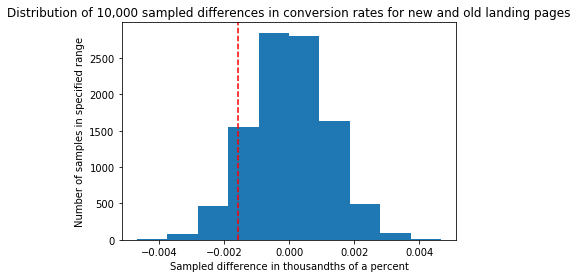

In [27]:
plt.hist(p_diffs2)
plt.axvline(x=difference_in_conversion_rates, color='red', linestyle='--')
plt.title("Distribution of 10,000 sampled differences in conversion rates for new and old landing pages")
plt.xlabel('Sampled difference in thousandths of a percent')
plt.ylabel('Number of samples in specified range')

**j.** What proportion of the **p_diffs** are greater than the actual difference observed in the `df2` data?

In [28]:
#loop to get p_diff > observed difference values. Probably could be done a little cleaner
greater_than_obs_diff_container = []
for i in range(len(p_diffs2)):
    if p_diffs2[i] > difference_in_conversion_rates:
        greater_than_obs_diff_container.append(p_diffs2[i])
#Rounded proportion of p_diff values that are greater than the actual observed difference from df2        
print(len(greater_than_obs_diff_container) / len(p_diffs2))

0.9093


**k.** Please explain in words what you have just computed in part **j** above.  
 - What is this value called in scientific studies?  
 - What does this value signify in terms of whether or not there is a difference between the new and old pages? *Hint*: Compare the value above with the "Type I error rate (0.05)". 

### Question K.

- The value of 0.9093 calculated above is the P-value for the dataset tested. The P-value is used to represent the chance that a researcher may observe results that are as extreme as the real P-value when the null hypothesis is assumed correct. Usually the P-value is used in tandem with a type 1 error rate or 'alpha' (in this case 0.05), and these two values are then compared to conclude if the observed change is relevant or just a conincidence.

- When the P-value is less than the type 1 error rate, the data shows that the observed change may be significant and not just a fluke. Inversely, if the P-value is greater than type 1 error rate it may show that the observed statistic is not significant and may boil down to a fluke born from the random variations in sample data.

- In this case with a p-value of 0.9093, which is many degrees bigger than the type 1 error rate of 0.05, the difference in conversion rates comparitively between the new page and the old page cannot be considered significant. If the difference in conversion rates cannot be considered significant, then I have failed to reject the null hypothesis, and the old landing page is just as useful as the new one (for now).

- Interestingly, if I go back to the variable holding my difference_in_conversion_rates and switch the places of the control and treatment groups, Ie. instead of using 'treatment_coversion_rate - control_coversion_rate', using this 'control_coversion_rate - treatment_coversion_rate' the P-value dropped significantly to 0.096. Although this does still result in failure to reject the null hypothesis, it is very interesting to note. I am assuming the negative number produced in the used difference variable caused this phenomenon. 



**l. Using Built-in Methods for Hypothesis Testing**<br>
We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. 

Fill in the statements below to calculate the:
- `convert_old`: number of conversions with the old_page
- `convert_new`: number of conversions with the new_page
- `n_old`: number of individuals who were shown the old_page
- `n_new`: number of individuals who were shown the new_page


In [29]:
import statsmodels.api as sm

# number of conversions with the old_page
convert_old = len(df2.query('group == "control" and converted != 0'))
#control_coversion_rate

# number of conversions with the new_page
convert_new = len(df2.query('group == "treatment" and converted != 0'))
#treatment_coversion_rate

# number of individuals who were shown the old_page
n_old = N_old


# number of individuals who received new_page
n_new = N_new


/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


**m.** Now use `sm.stats.proportions_ztest()` to compute your test statistic and p-value.  [Here](https://www.statsmodels.org/stable/generated/statsmodels.stats.proportion.proportions_ztest.html) is a helpful link on using the built in.

The syntax is: 
```bash
proportions_ztest(count_array, nobs_array, alternative='larger')
```
where, 
- `count_array` = represents the number of "converted" for each group
- `nobs_array` = represents the total number of observations (rows) in each group
- `alternative` = choose one of the values from `[‘two-sided’, ‘smaller’, ‘larger’]` depending upon two-tailed, left-tailed, or right-tailed respectively. 
>**Hint**: <br>
It's a two-tailed if you defined $H_1$ as $(p_{new} = p_{old})$. <br>
It's a left-tailed if you defined $H_1$ as $(p_{new} < p_{old})$. <br>
It's a right-tailed if you defined $H_1$ as $(p_{new} > p_{old})$. 

The built-in function above will return the z_score, p_value. 

---
### About the two-sample z-test
Recall that you have plotted a distribution `p_diffs` representing the
difference in the "converted" probability  $(p{'}_{new}-p{'}_{old})$  for your two simulated samples 10,000 times. 

Another way for comparing the mean of two independent and normal distribution is a **two-sample z-test**. You can perform the Z-test to calculate the Z_score, as shown in the equation below:

$$
Z_{score} = \frac{ (p{'}_{new}-p{'}_{old}) - (p_{new}  -  p_{old})}{ \sqrt{ \frac{\sigma^{2}_{new} }{n_{new}} + \frac{\sigma^{2}_{old} }{n_{old}}  } }
$$

where,
- $p{'}$ is the "converted" success rate in the sample
- $p_{new}$ and $p_{old}$ are the "converted" success rate for the two groups in the population. 
- $\sigma_{new}$ and $\sigma_{new}$ are the standard deviation for the two groups in the population. 
- $n_{new}$ and $n_{old}$ represent the size of the two groups or samples (it's same in our case)


>Z-test is performed when the sample size is large, and the population variance is known. The z-score represents the distance between the two "converted" success rates in terms of the standard error. 

Next step is to make a decision to reject or fail to reject the null hypothesis based on comparing these two values: 
- $Z_{score}$
- $Z_{\alpha}$ or $Z_{0.05}$, also known as critical value at 95% confidence interval.  $Z_{0.05}$ is 1.645 for one-tailed tests,  and 1.960 for two-tailed test. You can determine the $Z_{\alpha}$ from the z-table manually. 

Decide if your hypothesis is either a two-tailed, left-tailed, or right-tailed test. Accordingly, reject OR fail to reject the  null based on the comparison between $Z_{score}$ and $Z_{\alpha}$. 
>Hint:<br>
For a right-tailed test, reject null if $Z_{score}$ > $Z_{\alpha}$. <br>
For a left-tailed test, reject null if $Z_{score}$ < $Z_{\alpha}$. 


In other words, we determine whether or not the $Z_{score}$ lies in the "rejection region" in the distribution. A "rejection region" is an interval where the null hypothesis is rejected iff the $Z_{score}$ lies in that region.



Reference: 
- Example 9.1.2 on this [page](https://stats.libretexts.org/Bookshelves/Introductory_Statistics/Book%3A_Introductory_Statistics_(Shafer_and_Zhang)/09%3A_Two-Sample_Problems/9.01%3A_Comparison_of_Two_Population_Means-_Large_Independent_Samples), courtesy www.stats.libretexts.org

---

>**Tip**: You don't have to dive deeper into z-test for this exercise. **Try having an overview of what does z-score signify in general.** 

In [30]:
import statsmodels.api as sm
# Putting values into lists to pass to the z-test function
Old_and_new_converters = [convert_new, convert_old]
Old_and_new_nvalues = [n_new, n_old]
# ToDo: Complete the sm.stats.proportions_ztest() method arguments
z_score, p_value = sm.stats.proportions_ztest(Old_and_new_converters, Old_and_new_nvalues, alternative='larger')
print(f"Z score: {z_score} P value: {p_value}")

Z score: -1.3109241984234394 P value: 0.9050583127590245


**n.** What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?<br><br>

>**Tip**: Notice whether the p-value is similar to the one computed earlier. Accordingly, can you reject/fail to reject the null hypothesis? It is important to correctly interpret the test statistic and p-value.

### Question N.

- Z score shows how many standard deviations away a value is from another value. In this case the findings show that the conversion rate for the new page (treatment group) is -1.3 standard deviations away from the conversion rate of the old page. This can be interpreted as the new page being 1.3 standard deviations less than the conversion rate for the old page. Showing that the old page is more effective with a high degree of confidence. 

- The P value calculated by the z score function test is very near to the P score that I calculated earlier, coming out to around 0.90. The values were off by about 2 thousandths of a percent, which seems a neglible amount given I cant see exactly how the z test function is using the data I give to it. Either way, both my test and z test function calculated an about 90% distribution of sample observations that were greater than (more extreme) than the real observed P value. This leads me to reinforce my earlier idea that the null hypothesis should fail to be rejected. 

<a id='regression'></a>
### Part III - A regression approach

### ToDo 3.1 
In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

**a.** Since each row in the `df2` data is either a conversion or no conversion, what type of regression should you be performing in this case?

### Question A.
- The best bet for creating a regression model based upon binary values like those found in the df2 dataframe would be a logistic regression.  
- Due to the fact that there are only two choices, we can store these values in binary form, which is either a 0 or a 1. Luckily our data is already stored this way.(binary values found in conversion column) (no conversion = 0, succesful conversion = 1) 

**b.** The goal is to use **statsmodels** library to fit the regression model you specified in part **a.** above to see if there is a significant difference in conversion based on the page-type a customer receives. However, you first need to create the following two columns in the `df2` dataframe:
 1. `intercept` - It should be `1` in the entire column. 
 2. `ab_page` - It's a dummy variable column, having a value `1` when an individual receives the **treatment**, otherwise `0`.  

In [31]:
df2['intercept'] = 1
df2['ab_page'] = 0
# This one was tricky, I used this source as a reference to build this: 
#https://stackoverflow.com/questions/45470219/set-values-based-on-df-query
df2.loc[df2['group'] == 'treatment', 'ab_page'] = 1
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


**c.** Use **statsmodels** to instantiate your regression model on the two columns you created in part (b). above, then fit the model to predict whether or not an individual converts. 


In [32]:
log_regression_model = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
fit_log_data = log_regression_model.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


**d.** Provide the summary of your model below, and use it as necessary to answer the following questions.

In [33]:
#Tried to use .summmary() but was getting a weird error. I found this website explaining the two ways to solve, and I chose the easier way.
#https://stackoverflow.com/questions/49814258/statsmodel-attributeerror-module-scipy-stats-has-no-attribute-chisqprob
fit_log_data.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2023-07-07 22:15 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

**e.** What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  

**Hints**: 
- What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**? 
- You may comment on if these hypothesis (Part II vs. Part III) are one-sided or two-sided. 
- You may also compare the current p-value with the Type I error rate (0.05).


### Question E.

- The P value associated with the ab_page is 0.19 when rounded up. This is a much smaller value then the ones that we initially saw in sections j and k of about .90. 
- Both hypothesis offered assumed that there was an equal chance (0.11959708724499628) that either landing page could convert the user that visited it. Which is not assumed here in the new model. 
- The P value for the ab_page is still much larger than type I error threshold of 0.05, this shows that this regression model has come to the conclusion that the difference in conversion rates is insignificant at best. The same conclusion that I arrived at in section j and k. 
- The last thing that is attributing to the difference in the P value for this model is the fact that this is using a two tailed test setup, while in secions j and k I was using a one tailed setup. Effectively the null hypothesis and the alternative hypothesis have changed from looking at is the conversion rate of P new greater than P old to is the conversion rate of P new the same as P old!

**f.** Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

### Question F. 
- Due to the nature of the information we are looking at in this data set, it would be really nice to have some deeper understanding on the users being show these landing pages.
- If we knew the gender, age, location, etc. of the user then we could further tailor the model to efficiently predict what category of user is more likely to convert from a certain landing page. For example, if users in the US are more likely to convert when viewing the new page, it may be benficial to keep the new page in that country and the control page in a country thats less likely to convert.  
- Adding too many variables or complex relationships to the model can lead to overfitting. Overfitting occurs when the model becomes too closely tailored to the idiosyncrasies of the training data, resulting in poor generalization to new data. This can reduce the model's predictive accuracy when applied to unseen data. It is important to strike a balance between including relevant factors and keeping the model parsimonious.
- Although it is great to refine a model, if you introduce too many variables, it could lead to many different issues such as overfitting and increased complexity in discerning meaningful outcomes. 
- Overly complex models can start to build dependency between column values which may skew how the data is analyzed, especially when exposed to new data sources that the model is not optimized for yet.

**g. Adding countries**<br> 
Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. 

1. You will need to read in the **countries.csv** dataset and merge together your `df2` datasets on the appropriate rows. You call the resulting dataframe `df_merged`. [Here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html) are the docs for joining tables. 

2. Does it appear that country had an impact on conversion?  To answer this question, consider the three unique values, `['UK', 'US', 'CA']`, in the `country` column. Create dummy variables for these country columns. 
>**Hint:** Use `pandas.get_dummies()` to create dummy variables. **You will utilize two columns for the three dummy variables.** 

 Provide the statistical output as well as a written response to answer this question.

In [34]:
df_country = pd.read_csv('countries.csv')
#**Why does this not work when I set the index ahead of time, but when I use it in the join function below it works fine?
#df_country.set_index('user_id')


In [35]:
df_merged = df2.join(df_country.set_index('user_id'), on=('user_id'))
df_merged.head(10)

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US
5,936923,2017-01-10 15:20:49.083499,control,old_page,0,1,0,US
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1,CA
7,719014,2017-01-17 01:48:29.539573,control,old_page,0,1,0,US
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1,UK
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1,CA


In [36]:
# Create the necessary dummy variables
df_merged[['CA', 'UK', 'US']] = pd.get_dummies(df_merged['country'])
df_merged.head(10)

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,CA,UK,US
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,0,0,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0,1,0,US,0,0,1
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1,CA,1,0,0
7,719014,2017-01-17 01:48:29.539573,control,old_page,0,1,0,US,0,0,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1,UK,0,1,0
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1,CA,1,0,0


In [37]:
#Finding conversion rates associated with each country in the data
print("US conversion rate:")
print(df_merged.query('US == "1"')['converted'].sum() / len(df_merged.query('country == "US"')))
print("UK conversion rate:")
print(df_merged.query('UK == "1"')['converted'].sum() / len(df_merged.query('country == "UK"')))
print("CA conversion rate:")
print(df_merged.query('CA == "1"')['converted'].sum() / len(df_merged.query('country == "CA"')))

US conversion rate:
0.119546800642
UK conversion rate:
0.12059448569
CA conversion rate:
0.115318297814


### Question G.
- The calculated conversion rates of the three countries above shows that they all have a VERY similiar rate of conversion. 
- Using this information, I will say that the country does not have any significant impact on the likelhood of a user to convert on a landing page. 

**h. Fit your model and obtain the results**<br> 
Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if are there significant effects on conversion.  **Create the necessary additional columns, and fit the new model.** 


Provide the summary results (statistical output), and your conclusions (written response) based on the results. 

>**Tip**: Conclusions should include both statistical reasoning, and practical reasoning for the situation. 

>**Hints**: 
- Look at all of p-values in the summary, and compare against the Type I error rate (0.05). 
- Can you reject/fail to reject the null hypotheses (regression model)?
- Comment on the effect of page and country to predict the conversion.


In [65]:
#In order to get the P values associated with all the countries, I had to multiply the ab_page column and the country columns. 
#When I attempted to do this with ab_page included I ran into a weird problem where the P values were all the same. The functionality of either way should work to my knowledge. Advice?
#These values should equate to the same thing based on how the sm.logit function describes its functionality. 
#I also referenced another persons A/B testing project as I was struggling to actaully conceptualize how to make this happen with the info from statsmodels page
#I used these three websites to reference everything after this line: 
#https://www.statsmodels.org/stable/generated/statsmodels.discrete.discrete_model.Logit.html
#https://github.com/Abhishek20182/Analyze-AB-Test-Results/blob/master/Analyze_ab_test_results_notebook.ipynb
#https://numpy.org/doc/stable/reference/generated/numpy.exp.html
df_merged['US_times_ab_page'] = (df_merged['US'] * df_merged['ab_page'])
df_merged['UK_times_ab_page'] = (df_merged['UK'] * df_merged['ab_page'])
df_merged['CA_times_ab_page'] = (df_merged['CA'] * df_merged['ab_page'])



log_regression_model = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
fit_log_data = log_regression_model.fit()

In [84]:
# Fit your model, and summarize the results
log_regression_model3 = sm.Logit(df_merged['converted'], df_merged[['intercept', 'US_times_ab_page', 'UK_times_ab_page', 'CA_times_ab_page']])
fit_log_data3 = log_mod.fit()
fit_log_data3.summary2()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2023-07-07 23:21 AIC:              212778.9383
No. Observations:   290584           BIC:              212821.2568
Df Model:           3                Log-Likelihood:   -1.0639e+05
Df Residuals:       290580           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
------------------------------------------------------------------
                  Coef.  Std.Err.     z     P>|z|   [0.025  0.975]
------------------------------------------------------------------
intercept        -1.9888   0.0081 -246.6690 0.0000 -2.0046 -1.9730
US_times_ab_page -0.0183   0.0126   -1.4486 0.1475 -0.0430  0.0064
UK_times_ab_page  0.0074   0.0180    0.4098 0.6819 -0.0279  0.0427
CA_times_ab_page -0.0827   0.0380   -2.1763 0.0295 -0.1571 -0.0082
==================================================================

"""

In [90]:
np.exp(fit_log_data3.params)

intercept           0.136863
US_times_ab_page    0.981901
UK_times_ab_page    1.007417
CA_times_ab_page    0.920649
dtype: float64

### Conclusion
- After analyzing the data from multiple angles and using multiple statistical tools, none of the analyses have shown a significant improvement in conversion rate with the new page as compared to the old page. The data suggests that the new page may even possibly be less effective in converting users than the old page. Using the best case scenario for the new page, the conversion rate would still only be equal to that of the old pages conversion rate. I also considered the impact of the users country on the conversion results, and the data shows that the user country does not significantly alter conversion rates either. Based on the data shown through the multiple tests, I cannot suggest rejecting the null hypothesis and recommend keeping the old landing page as the default for the time being. More data may being collected may lead to my conclusions being erroneous, but for the time being this is correct.
- I would like to address the limitations and potential sources of error when interpreting P-values in data analysis. P-values are commonly used as a measure of statistical significance, but they can be susceptible to misinterpretation or misapplication. Factors leik sample size, variability, and underlying assumptions can influence P-values and lead to miscalcultions.
- Furthermore, P values only provide a probabilistic analyis of the data under the assumption that the null hypothesis is true. P values do not provide direct evidence for the truth or falsehood of the null hypothesis itself. One must consider the broader context and mesh findings through additional analyses or alternative statistical methods to come to a definitve conslusion on any matter.

### Resources
##### ***Some resources I put in line as they directly helped me formulate the code in that cell. 
##### ***All resources here were used for general syntax and question clarification

- https://www.geeksforgeeks.org/
- https://knowledge.udacity.com/questions/32882
- https://knowledge.udacity.com/questions/621478
- https://pandas.pydata.org/pandas-docs/stable/index.html

<a id='finalcheck'></a>
## Final Check!

Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your notebook to make sure that it satisfies all the specifications mentioned in the rubric. You should also probably remove all of the "Hints" and "Tips" like this one so that the presentation is as polished as possible.


<a id='submission'></a>
## Submission
You may either submit your notebook through the "SUBMIT PROJECT" button at the bottom of this workspace, or you may work from your local machine and submit on  the last page of this project lesson.  

1. Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).


2. Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.


3. Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [40]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0